## Boolia bostadsmarknads analys 
Perioden :
    20220101-20220715

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
bost_df=pd.read_csv('scrape_booli_2022-07-19.csv',index_col=False)
bo_pris_indik=pd.read_csv('bo_pris_indikator.csv')

In [6]:
# Vänd på hela steken så att det passar diagrammet
bo_pris_indik=bo_pris_indik.sort_index(axis=0,ascending=False)

In [7]:
# # plotparams
# ggplot_styles = {
#     'axes.edgecolor': 'black',
#     'axes.facecolor': 'EBEBEB',
#     'axes.grid': True,
#     'axes.grid.which': 'both',
#     'axes.spines.left': False,
#     'axes.spines.right': False,
#     'axes.spines.top': False,
#     'axes.spines.bottom': False,
#     'grid.color': 'white',
#     'grid.linewidth': '0.6',
#     'xtick.color': '555555',
#     'xtick.major.bottom': True,
#     'xtick.minor.bottom': False,
#     'ytick.color': '555555',
#     'ytick.major.left': True,
#     'ytick.minor.left': False,
# }
# plt.rcParams.update(ggplot_styles)

- Assess  
- Define  
- Clean  
- Analyze  
- Visualize  



Assess:
- Alla kolumner kan ha bättre namn   

unnamed:
- [X] Ta bort index då det inte behövs, unnamed   

b_size:
-  delas till 2 kolumner
 - ant_rum
 - bost_stlk_m2

b_price:  
- ta bort kr i b-price
- gör om datatyp

b_pr_m2 :  
- ta bort kr/m2 på alla hus

b_sale_date:
gör om till date_time






In [8]:
bost_df.head()

,Unnamed: 0,b_loc,b_size,b_price,b_pr_m2,b_sale_rslt,b_sale_date
0,0,Kärleksstigen 28,"6 rum, 161 m²",2 500 000 kr,15 500 kr/m²,0.0,2022-07-15
1,1,Hagagatan 7,"4 rum, 122 m²",1 100 000 kr,9 000 kr/m²,-7.9,2022-07-14
2,2,Uddabergsvägen 15,"4 rum, 119 m²",4 680 000 kr,39 300 kr/m²,4.1,2022-07-13
3,3,Lerdala Åbod gatan,"2 rum, 73 m²",1 650 000 kr,22 600 kr/m²,-2.1,2022-07-12
4,4,Rönnbärsvägen 21,"7 rum, 164 m²",2 300 000 kr,14 000 kr/m²,4.8,2022-07-12


**Define** 
Ta bort column 0
<!-- bost_df.reset_index() -->
Code :

In [9]:
#Drop column 0
bost_df.drop(bost_df.iloc[:,0:1],axis=1,inplace=True)
# Osäker på om denna behövs:
#bost_df.reset_index()

Test:

**Define:**  
    Dela på antal rum och kvm  
    Code:

In [10]:
#dela på b_size
bost_df[['ant_rum','kvm']]=bost_df.b_size.str.split(',',expand=True)

In [11]:
#Drop column b_size
bost_df.drop(['b_size'],axis=1,inplace=True)

In [12]:
bost_df.head()

,b_loc,b_price,b_pr_m2,b_sale_rslt,b_sale_date,ant_rum,kvm
0,Kärleksstigen 28,2 500 000 kr,15 500 kr/m²,0.0,2022-07-15,6 rum,161 m²
1,Hagagatan 7,1 100 000 kr,9 000 kr/m²,-7.9,2022-07-14,4 rum,122 m²
2,Uddabergsvägen 15,4 680 000 kr,39 300 kr/m²,4.1,2022-07-13,4 rum,119 m²
3,Lerdala Åbod gatan,1 650 000 kr,22 600 kr/m²,-2.1,2022-07-12,2 rum,73 m²
4,Rönnbärsvägen 21,2 300 000 kr,14 000 kr/m²,4.8,2022-07-12,7 rum,164 m²


**Define**  
Remove ' m²' från kvm
Remove kr/m² från b_pr_m2
 
Code:

In [13]:
bost_df.rename(columns = {'b_price':'b_price_kr','kvm':'kvm_m2','b_pr_m2':'b_price_m2_kr','ant_rum':'amt_room'}, inplace = True)

In [14]:
bost_df.head(1)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2 500 000 kr,15 500 kr/m²,0.0,2022-07-15,6 rum,161 m²


In [15]:
# remove m2 from kvm kolumn
bost_df.kvm_m2=bost_df.kvm_m2.str.replace(' m²','')

In [16]:
#remove kr/m2 from .b_pr_m2
bost_df.b_price_m2_kr=bost_df.b_price_m2_kr.str.replace(' kr/m²','')

In [17]:
bost_df.b_price_kr=bost_df.b_price_kr.str.replace(' kr','')

In [18]:
bost_df.amt_room=bost_df.amt_room.str.replace(' rum','')

In [19]:
bost_df.head()

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2 500 000,15 500,0.0,2022-07-15,6,161
1,Hagagatan 7,1 100 000,9 000,-7.9,2022-07-14,4,122
2,Uddabergsvägen 15,4 680 000,39 300,4.1,2022-07-13,4,119
3,Lerdala Åbod gatan,1 650 000,22 600,-2.1,2022-07-12,2,73
4,Rönnbärsvägen 21,2 300 000,14 000,4.8,2022-07-12,7,164


In [20]:
# DENNA KANSKE MÅSTE VARA KVAR!
#bost_df['kvm_m2']=bost_df.b_size_m2.str.split(',',expand=True)[1].str.replace(' m²','')

### Fix Antal rum

In [21]:
bost_df['amt_room']=bost_df['amt_room'].replace('None',np.nan)

In [22]:
bost_df.amt_room.dropna()

0      6
1      4
2      4
3      2
4      7
      ..
156    6
162    4
163    6
164    5
173    6
Name: amt_room, Length: 74, dtype: object

Convert to integers ,
problems to do cast to int from string

In [23]:
bost_df['amt_room']=bost_df['amt_room'].str.strip()

Try to replace NaN to -1 istället för att kunna konvertera dessa till int

In [24]:
bost_df.amt_room=bost_df.amt_room.replace(np.nan,-1)
#bost_df.replace(np.nan, -1)

In [25]:
bost_df.amt_room.sample()

47    6
Name: amt_room, dtype: object

In [26]:
# make string = int 
bost_df.amt_room=bost_df.amt_room.astype('int')

In [27]:
bost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   b_loc          175 non-null    object 
 1   b_price_kr     175 non-null    object 
 2   b_price_m2_kr  175 non-null    object 
 3   b_sale_rslt    175 non-null    float64
 4   b_sale_date    175 non-null    object 
 5   amt_room       175 non-null    int32  
 6   kvm_m2         175 non-null    object 
dtypes: float64(1), int32(1), object(5)
memory usage: 9.0+ KB


problem med mellanslag i bost_pris, måste ordnas innan konvertering

### Fix b_price_kr

In [28]:
#Remove mellanslag i b_price_kr
bost_df['b_price_kr']=bost_df['b_price_kr'].str.strip()
bost_df['b_price_kr']=bost_df['b_price_kr'].str.replace(' ','')

In [29]:
bost_df['b_price_kr']

0      2500000
1      1100000
2      4680000
3      1650000
4      2300000
        ...   
170    5100000
171    2350000
172    2500000
173     950000
174    2600000
Name: b_price_kr, Length: 175, dtype: object

In [30]:
#Cast b_price_kr to int
bost_df['b_price_kr']=bost_df['b_price_kr'].astype(int)

In [31]:
bost_df.head()

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2500000,15 500,0.0,2022-07-15,6,161
1,Hagagatan 7,1100000,9 000,-7.9,2022-07-14,4,122
2,Uddabergsvägen 15,4680000,39 300,4.1,2022-07-13,4,119
3,Lerdala Åbod gatan,1650000,22 600,-2.1,2022-07-12,2,73
4,Rönnbärsvägen 21,2300000,14 000,4.8,2022-07-12,7,164


### Fix datetime

In [32]:
bost_df['b_sale_date']=pd.to_datetime(bost_df['b_sale_date'])

### Fix kvm_m2

In [33]:
bost_df['kvm_m2']=bost_df['kvm_m2'].str.replace('m²','')

In [34]:
bost_df['kvm_m2']=bost_df['kvm_m2'].str.replace('½','')

In [35]:
bost_df['kvm_m2'].sample()

143     72
Name: kvm_m2, dtype: object

In [36]:
bost_df['kvm_m2']=bost_df['kvm_m2'].astype(int)

In [37]:
bost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   b_loc          175 non-null    object        
 1   b_price_kr     175 non-null    int32         
 2   b_price_m2_kr  175 non-null    object        
 3   b_sale_rslt    175 non-null    float64       
 4   b_sale_date    175 non-null    datetime64[ns]
 5   amt_room       175 non-null    int32         
 6   kvm_m2         175 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(2)
memory usage: 7.6+ KB


In [38]:
#remove blanks
bost_df['b_price_m2_kr']=bost_df['b_price_m2_kr'].str.replace(' ','')

In [39]:
bost_df['kvm_m2']=bost_df['kvm_m2'].astype(int)
##bost_df['kv_m']=bost_df['kv_m'].str.extractall('(\d+)').unstack().astype(int)

In [40]:
bost_df['b_price_m2_kr']=bost_df['b_price_m2_kr'].astype(int)

In [41]:
bost_df.dtypes

b_loc                    object
b_price_kr                int32
b_price_m2_kr             int32
b_sale_rslt             float64
b_sale_date      datetime64[ns]
amt_room                  int32
kvm_m2                    int32
dtype: object

In [42]:
bost_df.head(3)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2500000,15500,0.0,2022-07-15,6,161
1,Hagagatan 7,1100000,9000,-7.9,2022-07-14,4,122
2,Uddabergsvägen 15,4680000,39300,4.1,2022-07-13,4,119


#### Save finished wrangled file to new CSV
## Move this line below , when all is finished

In [43]:
now=datetime.now()
dt=now.strftime("%Y_%m_%d")
bost_df.to_csv(f'wrangled_bost_p{dt}.csv',sep=',',encoding='utf-8')

In [44]:
#### Beräkna utgångspriset på fastigheten
# enligt rutan nedan kan man inte använda procent talet direkt utan måste konvertera detta först så att det passar beräkningen.

In [45]:
#make column ack_calk_res
bost_df['ack_calc_res']=bost_df['b_sale_rslt']*0.01

In [46]:
bost_df.head()


,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2,ack_calc_res
0,Kärleksstigen 28,2500000,15500,0.0,2022-07-15,6,161,0.000
1,Hagagatan 7,1100000,9000,-7.9,2022-07-14,4,122,-0.079
2,Uddabergsvägen 15,4680000,39300,4.1,2022-07-13,4,119,0.041
3,Lerdala Åbod gatan,1650000,22600,-2.1,2022-07-12,2,73,-0.021
4,Rönnbärsvägen 21,2300000,14000,4.8,2022-07-12,7,164,0.048


#### calculate the starting price for houses 

In [47]:
for item in bost_df.ack_calc_res:
    
    if item < 0:
        bost_df['starting_price']=(bost_df.b_price_kr/(1-bost_df.ack_calc_res)).round()
    else:
        bost_df['starting_price']=(bost_df.b_price_kr / (1+bost_df.ack_calc_res))
        

In [48]:
bost_df.starting_price.astype(int)

0      2500000
1      1194353
2      4495677
3      1685393
4      2194656
        ...   
170    4501323
171    1644506
172    2495009
173     950000
174    2394106
Name: starting_price, Length: 175, dtype: int32

In [49]:
bost_df.head(3)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2,ack_calc_res,starting_price
0,Kärleksstigen 28,2500000,15500,0.0,2022-07-15,6,161,0.000,2.500000e+06
1,Hagagatan 7,1100000,9000,-7.9,2022-07-14,4,122,-0.079,1.194354e+06
2,Uddabergsvägen 15,4680000,39300,4.1,2022-07-13,4,119,0.041,4.495677e+06


In [50]:
bost_df.sample(10)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2,ack_calc_res,starting_price
53,Fredriksbergsvägen 43,2200000,20600,12.8,2022-05-27,5,107,0.128,1.950355e+06
112,Smedjevägen 10,4100000,34700,-3.0,2022-03-28,5,118,-0.030,4.226804e+06
126,Egnahemsvägen 19,4620000,34200,-3.0,2022-03-10,-1,135,-0.030,4.762887e+06
57,Talgoxevägen 15,5775000,24400,-2.9,2022-05-24,-1,237,-0.029,5.947477e+06
10,Mariestadsvägen 1,2850000,16800,0.0,2022-07-05,8,170,0.000,2.850000e+06
108,Kamomillvägen 12,4450000,29300,-3.0,2022-03-31,5,152,-0.030,4.587629e+06
107,Duvstigen 3,4050000,31600,8.0,2022-03-31,5,128,0.080,3.750000e+06
38,Sörgårdsvägen 45,615000,6500,12.8,2022-06-07,4,94,0.128,5.452128e+05
48,Segerstorpsvägen 20,3800000,24800,8.7,2022-05-31,-1,153,0.087,3.495860e+06
49,Vråkvägen 3,4700000,32200,0.0,2022-05-31,-1,146,0.000,4.700000e+06


## ANALYSE

#### Hur många av husen som sålts senaste perioden har varit + - 0 

####  Data:
- Totalt antal objekt : 176
- Antal hus som gått +
- Antal hus som gått -
- Antal hus som +-0




In [51]:
bost_df.index

RangeIndex(start=0, stop=175, step=1)

In [52]:
# fråga: Hur många hus har - ack_res
p_less=0
p_grt=0
p_no_chg=0
for item in bost_df.ack_calc_res:
    if item == 0:
        p_no_chg+=1
    elif item < 0:
        p_less+=1
    elif item > 0:
        p_grt+=1
        
        

In [53]:
p_grt,p_less,p_no_chg

(82, 77, 16)

In [54]:
p_grt+p_less+p_no_chg

175

In [55]:
bost_df.amt_room.value_counts()

-1    101
 6     19
 5     19
 4     18
 7     10
 8      3
 3      3
 2      2
Name: amt_room, dtype: int64

In [56]:
bost_df.describe()

,b_price_kr,b_price_m2_kr,b_sale_rslt,amt_room,kvm_m2,ack_calc_res,starting_price
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,3.578571e+06,27172.000000,3.477714,1.640000,134.937143,0.034777,3.470637e+06
std,1.521723e+06,10517.902855,11.136820,3.211259,40.970013,0.111368,1.464678e+06
min,2.500000e+05,2900.000000,-23.600000,-1.000000,36.000000,-0.236000,2.604167e+05
25%,2.500000e+06,20600.000000,-4.000000,-1.000000,106.500000,-0.040000,2.408840e+06
50%,3.550000e+06,27700.000000,0.000000,-1.000000,130.000000,0.000000,3.495763e+06
75%,4.500000e+06,34100.000000,9.800000,5.000000,161.000000,0.098000,4.461947e+06
max,7.650000e+06,81300.000000,43.300000,8.000000,260.000000,0.433000,7.782299e+06


In [57]:
bost_df.kvm_m2.mean()

134.93714285714285

In [58]:
num_bye=bost_df.shape[0]

In [59]:
#Fråga : alla + vals i en kolumn
big_profit_sales=bost_df.loc[(bost_df['ack_calc_res'] > 0) & (bost_df['b_sale_date'] < '2022-04-01' )] # & (bost_df['ant_rum'] > 1)
zero_profit_sales=bost_df.loc[(bost_df['ack_calc_res'] == 0) & (bost_df['b_sale_date'] < '2022-04-01' )]# & (bost_df['ant_rum'] > 1)
low_profit_sales=bost_df.loc[(bost_df['ack_calc_res'] < 0) & (bost_df['b_sale_date'] < '2022-04-01' )] #& (bost_df['ant_rum'] > 1)
#mrg_df_clean.loc[mrg_df_clean['prediction_dog_breed']=='golden_retriever']

In [60]:
#Fråga : alla + vals i en kolumn
big_prof_last=bost_df.loc[(bost_df['ack_calc_res'] > 0) & (bost_df['b_sale_date'] >= '2022-04-01' )] # & (bost_df['ant_rum'] > 1)
zero_prof_last=bost_df.loc[(bost_df['ack_calc_res'] == 0) & (bost_df['b_sale_date'] >= '2022-04-01' )]# & (bost_df['ant_rum'] > 1)
low_prof_last=bost_df.loc[(bost_df['ack_calc_res'] < 0) & (bost_df['b_sale_date'] >= '2022-04-01' )] #& (bost_df['ant_rum'] > 1)
allb_data_early=bost_df.loc[(bost_df['b_sale_date'] < '2022-04-01' )]
allb_data_late=bost_df.loc[(bost_df['b_sale_date'] >= '2022-04-01' )]

In [61]:
big_prof_last.shape

(44, 9)

In [62]:
#How many big profit sales ?
big_profit_sales.shape[0]

38

In [63]:
big_profit_sales.ack_calc_res.mean()

0.12147368421052633

In [64]:
# How many zero profit sales ?
zero_profit_sales.shape[0]

6

In [65]:
low_profit_sales.shape[0]

24

In [66]:
low_profit_sales.ack_calc_res.mean()

-0.030125000000000013

In [67]:
#Calc total amount of sales per low/big profit
tot_last=big_prof_last.shape[0]+zero_prof_last.shape[0]+low_prof_last.shape[0]
tot_before=big_profit_sales.shape[0]+zero_profit_sales.shape[0]+low_profit_sales.shape[0]

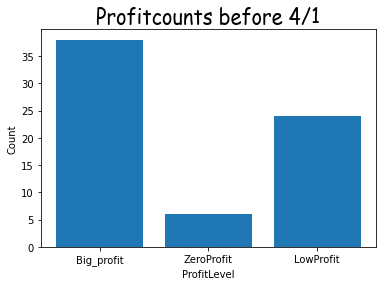

In [68]:
x_labels=['Big_profit','ZeroProfit','LowProfit']
y_values=[big_profit_sales.shape[0],zero_profit_sales.shape[0],low_profit_sales.shape[0]]
plt.title('Profitcounts before 4/1', fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel('ProfitLevel')
plt.ylabel('Count')
plt.bar(x_labels,y_values);
plt.show()

### Fråga 1 ).
#### Vad är andelen låg,noll,hög förtjänst försäljningar i första perioden ?

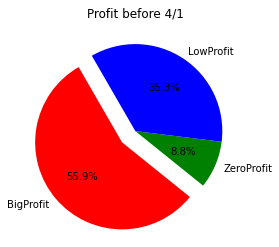

In [69]:
#Diplay profits done before middle 
arr=[big_profit_sales.shape[0]/tot_before,zero_profit_sales.shape[0]/tot_before,low_profit_sales.shape[0]/tot_before]
labels=["BigProfit","ZeroProfit","LowProfit"]
plt.title('Profit before 4/1')
my_expl=[0.2,0,0]
plt.pie(arr,labels=labels,explode=my_expl,startangle = 120,autopct='%1.1f%%',colors=['r', 'g', 'b'])
plt.show()

### Slutsats:
#### Nästan 56 % av alla affärer gick med vinst innan 4/1

### Fråga 2 ).
#### Vilken andel låg,noll,hög förtjänst för försäljningar efter 4/1 ?

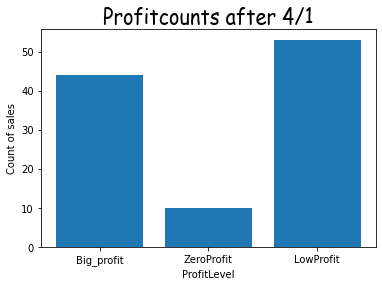

In [70]:
x_labels=['Big_profit','ZeroProfit','LowProfit']
y_values=[big_prof_last.shape[0],zero_prof_last.shape[0],low_prof_last.shape[0]]
plt.title('Profitcounts after 4/1', fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel('ProfitLevel')
plt.ylabel('Count of sales')
plt.bar(x_labels,y_values);
plt.show()

In [71]:
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

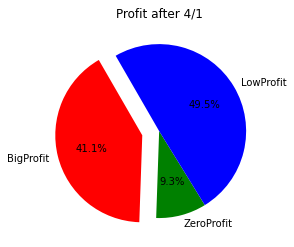

In [72]:
arr=[big_prof_last.shape[0]/tot_last,zero_prof_last.shape[0]/tot_last,low_prof_last.shape[0]/tot_last]
labels=["BigProfit","ZeroProfit","LowProfit"]
plt.title('Profit after 4/1')
plt.pie(arr,labels=labels,explode=my_expl,startangle = 120,autopct='%1.1f%%',colors=['r', 'g', 'b'])
#plt.pie(arr,labels=labels)
#plt.legend()
plt.show()

### Slutsats:
#### Nästan 50 % av alla affärer gick med förlust efter 4/1 , 10 % Noll result
#### 41,1 % Av alla affärer efter 4/1 gick med vinst
#### 15% färre affärer gick med vinst efter 4/1

#### Medelvärde kvadratmeterpris  

In [73]:
srt_profit=big_profit_sales.query('kvm_m2 > 99 and ack_calc_res > 0.05' ).sort_values(by='b_sale_rslt',ascending=False)

In [74]:
srt_profit.b_price_m2_kr.mean()

27925.0

In [75]:
#Denna kan tas bort
srt_profit.sort_values(by='b_sale_date',ascending=False)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2,ack_calc_res,starting_price
107,Duvstigen 3,4050000,31600,8.0,2022-03-31,5,128,0.080,3.750000e+06
109,Robin Granes väg 10,4300000,36800,13.3,2022-03-30,-1,117,0.133,3.795234e+06
115,Kärleksstigen 9,3360000,20700,16.1,2022-03-23,-1,162,0.161,2.894057e+06
117,Kryddvägen 1,6100000,36700,10.9,2022-03-19,6,166,0.109,5.500451e+06
118,Vadsbovägen 10,1850000,17300,9.5,2022-03-18,-1,107,0.095,1.689498e+06
125,Belleforsvägen 5,2350000,16800,7.1,2022-03-11,7,140,0.071,2.194211e+06
128,Mjölnarevägen 4,3250000,27800,8.5,2022-03-08,-1,117,0.085,2.995392e+06
127,Hentorpsvägen 52,3560000,30400,27.1,2022-03-08,-1,117,0.271,2.800944e+06
132,Örtvägen 3,5650000,39000,13.1,2022-03-01,-1,145,0.131,4.995579e+06
138,Lavendelvägen 5,6550000,36600,10.1,2022-02-25,-1,179,0.101,5.949137e+06


#### Scatterplot rum vs kvadratmeter

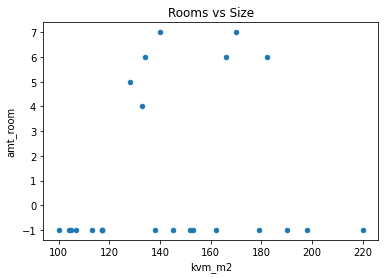

In [76]:
#plt.plot(y='amt_room',x='kvm_m2',kind='scatter')
srt_profit.plot(y='amt_room',x='kvm_m2',kind='scatter')
plt.title('Rooms vs Size')
plt.show()
#df_sm.plot(x='vote_average',y='profit',kind='scatter');

#### Scatterplot alla försäljningar och vinst/förlust

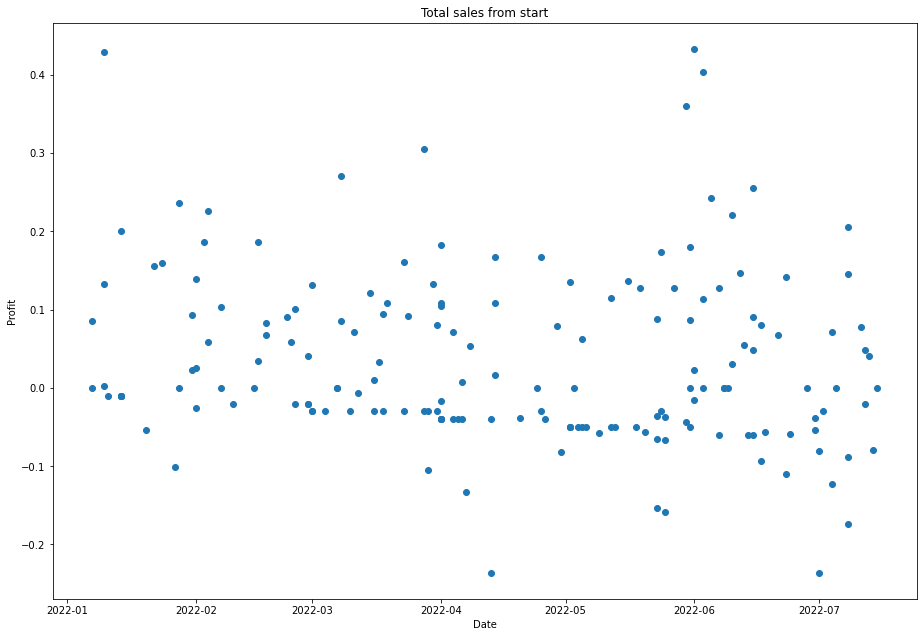

In [77]:
#y = [1, 4, 9, 16, 25,36,49, 64]
x=bost_df.b_sale_date
# x1 = [1, 16, 30, 42,55, 68, 77,88]
# x2 = [1,6,12,18,28, 40, 52, 65]
y=bost_df.ack_calc_res
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

l1 = ax.scatter(x,y) # solid line with yellow colour and square marker
#l2 = ax.plot(x2,y,'gx--') # dash line with green colour and circle marker
#ax.legend(labels = ('tv', 'Smartphone'), loc = 'lower right') # legend placed at lower right
ax.set_title("Total sales from start")
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
plt.show()

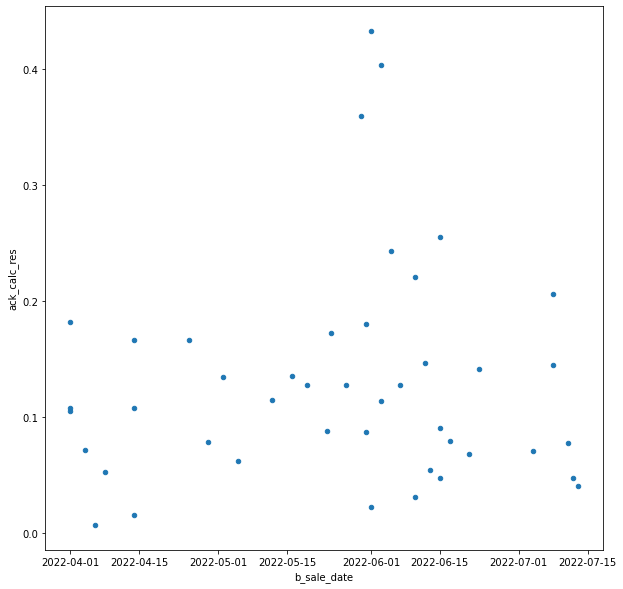

In [78]:
big_prof_last.plot(x='b_sale_date',y='ack_calc_res',kind='scatter',figsize=(10,10));

#### Fråga:
Hur fördelar sig vinsterna på de försäljningar som gått bäst ?

<AxesSubplot:>

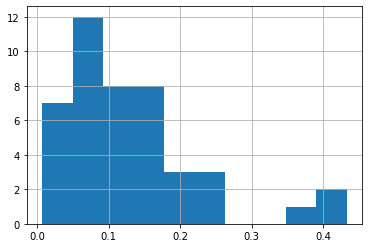

In [79]:
#Big profit distrobution
big_prof_last.ack_calc_res.hist()
#plt.axvline(sample_data.height.mean(),color='r', linewidth=2)

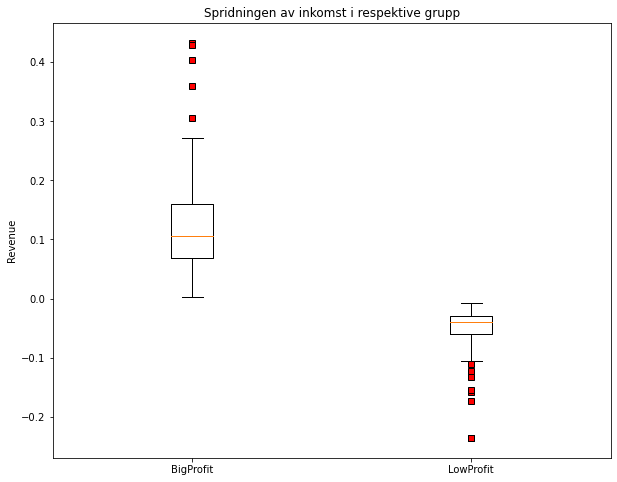

In [174]:
import warnings
warnings.filterwarnings("ignore")
green_diamond = dict(markerfacecolor='r', marker='s')
data=[big_prof_extra['ack_calc_res'],low_prof_extra['ack_calc_res']]
fig=plt.figure(figsize=(10,8))
ax = fig.subplots()
ax.set_title('Spridningen av inkomst i respektive grupp')
ax.set_xticklabels(['BigProfit','LowProfit'])
#ax.set_xlabels()
#ax.set_xlabels()
ax.set_ylabel('Revenue')
plt.boxplot(data,flierprops=green_diamond)
plt.show();

#### Fråga:
Hur fördelar sig alla vinster/försluster sedan start ?

<AxesSubplot:>

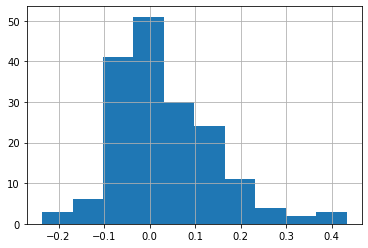

In [80]:
# Distrubution of all sales from start
bost_df.ack_calc_res.hist()

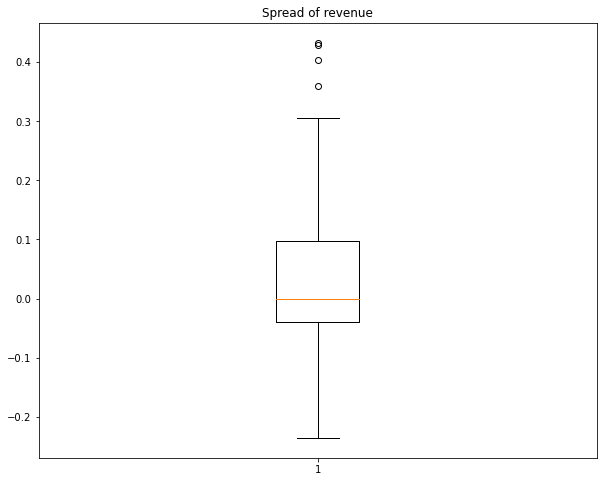

In [173]:
f=plt.figure(figsize=(10,8))
ax=f.subplots()
ax.set_title('Spread of revenue')
plt.boxplot(bost_df['ack_calc_res'])
plt.show()
#bost_df['ack_calc_res'].boxplotplot()

#### Fråga:
Hur fördelar sig vinster/försluster efter 4/1?

<AxesSubplot:>

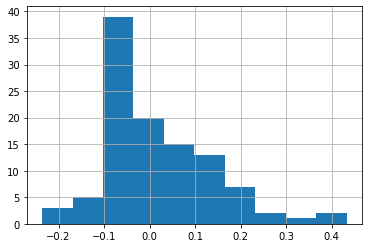

In [81]:
#Distrubution of sales after april
allb_data_late.ack_calc_res.hist()

In [82]:
grp_month=bost_df.groupby(bost_df.b_sale_date.dt.month)['ack_calc_res'].mean()

Prova att plotta ut high profit på samma sätt!
#### Plotta hela intervallet 

In [83]:
zero_profit_sales.groupby(zero_profit_sales.b_sale_date.dt.month).count()

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2,ack_calc_res,starting_price
b_sale_date,,,,,,,,,
1,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2


#### Hur många försäljningar per månad ?

In [84]:
# antal försäljningar
antal_sales_per_month=bost_df.groupby(bost_df.b_sale_date.dt.month).count()['ack_calc_res']
antal_sales_per_month

b_sale_date
1    19
2    21
3    28
4    27
5    33
6    31
7    16
Name: ack_calc_res, dtype: int64

In [122]:
#Fråga : alla + vals i en kolumn
big_prof_extra=bost_df.loc[(bost_df['ack_calc_res'] > 0)] # & (bost_df['ant_rum'] > 1)
zero_prof_extra=bost_df.loc[(bost_df['ack_calc_res'] == 0)]# & (bost_df['ant_rum'] > 1)
low_prof_extra=bost_df.loc[(bost_df['ack_calc_res'] < 0) ] #& (bost_df['ant_rum'] > 1)
#allb_data_early=bost_df.loc[(bost_df['b_sale_date'] < '2022-04-01' )]
#allb_data_late=bost_df.loc[(bost_df['b_sale_date'] >= '2022-04-01' )]

In [123]:
grp_big_p=big_prof_extra.groupby(big_prof_extra.b_sale_date.dt.month)['ack_calc_res'].mean()
grp_zero=zero_prof_extra.groupby(zero_prof_extra.b_sale_date.dt.month)['ack_calc_res'].mean()
grp_low_p=low_prof_extra.groupby(low_prof_extra.b_sale_date.dt.month)['ack_calc_res'].mean()


In [124]:
mont_sales_price_mean=bost_df.groupby(bost_df.b_sale_date.dt.month)['b_price_kr'].mean()
month_sales_start_price=bost_df.groupby(bost_df.b_sale_date.dt.month)['starting_price'].mean()

In [125]:
grp_low_p

b_sale_date
1   -0.029286
2   -0.021200
3   -0.034333
4   -0.059733
5   -0.060100
6   -0.060600
7   -0.103875
Name: ack_calc_res, dtype: float64

In [127]:
c_grp_big_p=big_prof_extra.groupby(big_prof_extra.b_sale_date.dt.month)['ack_calc_res'].count()
c_grp_zro_p=zero_prof_extra.groupby(zero_prof_extra.b_sale_date.dt.month)['ack_calc_res'].count()
c_grp_low_p=low_prof_extra.groupby(low_prof_extra.b_sale_date.dt.month)['ack_calc_res'].count()
#c_all_s_per_m=bost_df

In [147]:
Class = ["Jan", "Feb", "March", "April", "May","June","July","August"]


### Visa resultat
Antal försäljningar per månad från start

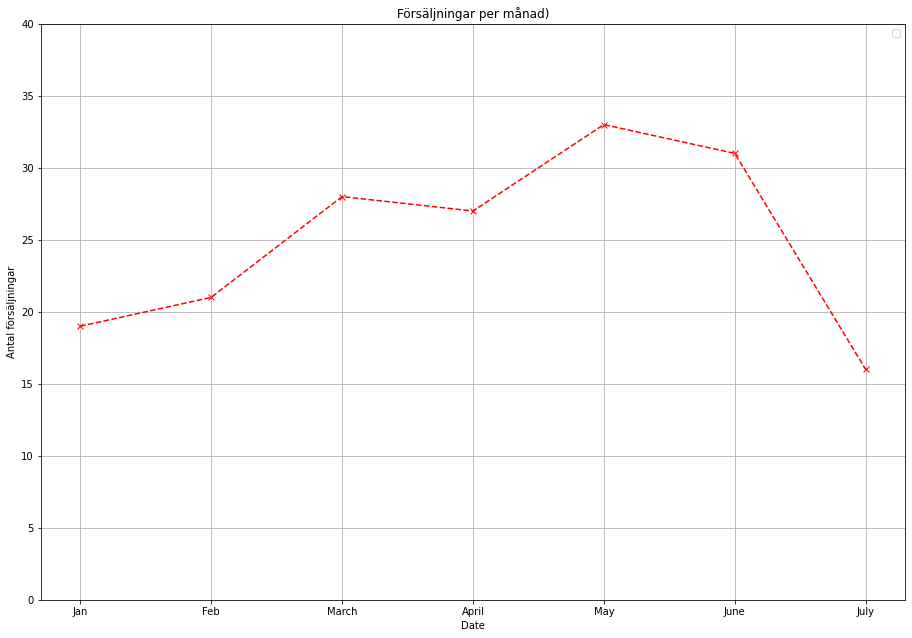

In [114]:
#antal_sales_per_month
mon = ["Jan", "Feb", "March", "April", "May","June","July"]
#mon=bost_df.b_sale_date
y=antal_sales_per_month.array
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.set_ylim([0,40])
l1 = ax.plot(mon,y,'rx--') # solid line with yellow colour and square marker
#l2 = ax.plot(x2,y,'gx--') # dash line with green colour and circle marker
plt.grid(True)
ax.legend('') # legend placed at lower right
ax.set_title("Försäljningar per månad)")
ax.set_xlabel('Date')
ax.set_ylabel('Antal försäljningar')
plt.show()

#### Beräkning av slutpriser

In [108]:
mont_sales_price_mean,month_sales_start_price

(b_sale_date
 1    4.125263e+06
 2    4.030000e+06
 3    3.792321e+06
 4    3.462593e+06
 5    3.610152e+06
 6    3.284839e+06
 7    2.662500e+06
 Name: b_price_kr, dtype: float64,
 b_sale_date
 1    3.922091e+06
 2    3.809374e+06
 3    3.664012e+06
 4    3.441785e+06
 5    3.570771e+06
 6    3.136108e+06
 7    2.641844e+06
 Name: starting_price, dtype: float64)

### Hur mycket har huspriset sjunkt från månad 4-7

In [184]:
month_sales_start_price[7]/month_sales_start_price[4]

0.7675794450074249

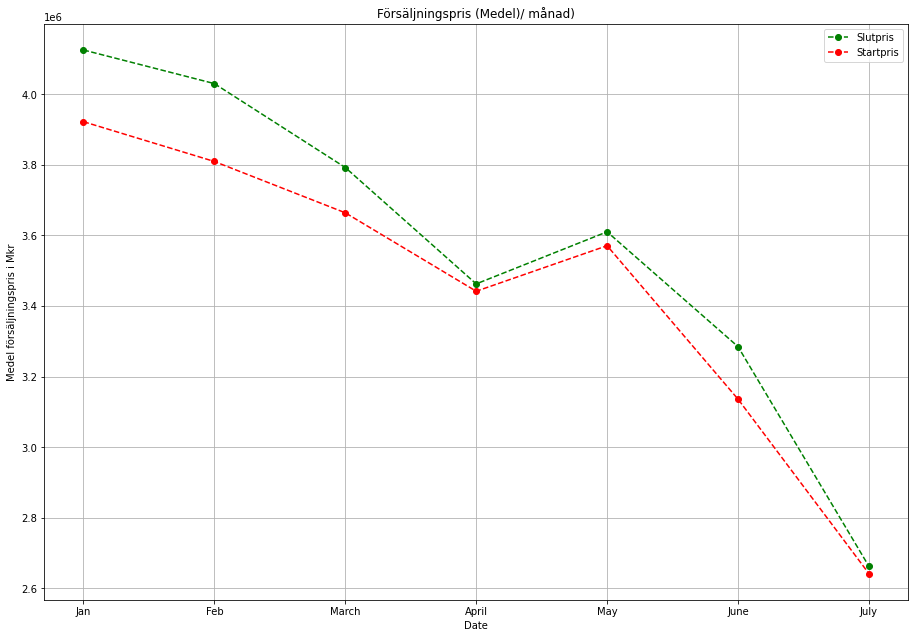

In [115]:
figg=plt.figure()
axx = figg.add_axes([0,0,2,2])
l = axx.plot(mon,mont_sales_price_mean.array,'go--') # solid line with yellow colour and square marker
k=axx.plot(mon,month_sales_start_price.array,'ro--')
plt.grid(True)
axx.legend(['Slutpris','Startpris']) # legend placed at lower right
axx.set_title("Försäljningspris (Medel)/ månad)")
axx.set_xlabel('Date')
axx.set_ylabel('Medel försäljningspris i Mkr')
plt.show()

### Slutsats:
    Större spridning på högvinsterna än på lågvinsterna(För hela perioden)

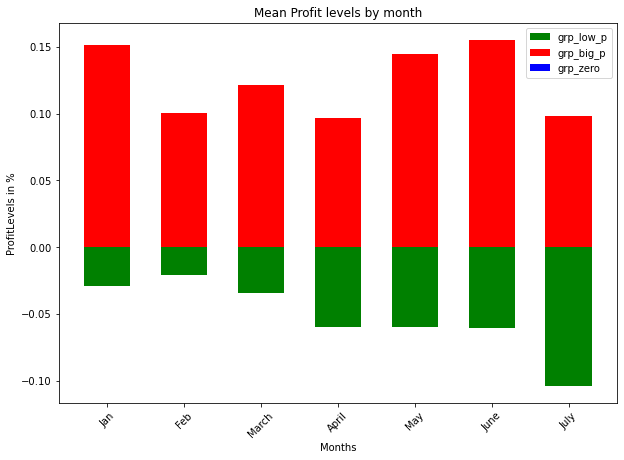

In [120]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=45)
plt.title('Mean Profit levels by month')
plt.xlabel('Months')
plt.ylabel('ProfitLevels in %')
Class = ["Jan", "Feb", "March", "April", "May","June","July"]

#w=0.6
plt.bar(Class,grp_low_p.array,w,label='grp_low_p',color='green')
plt.bar(Class,grp_big_p.array,w,color='red',label='grp_big_p')
plt.bar(Class,grp_zero.array,w,color='blue',label='grp_zero') 
plt.legend()
plt.show()


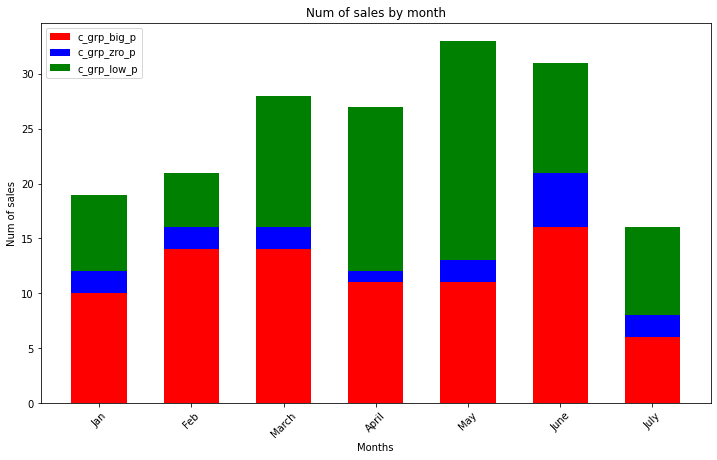

In [128]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
plt.title('Num of sales by month')
plt.xlabel('Months')
plt.ylabel('Num of sales')
Class = ["Jan", "Feb", "March", "April", "May","June","July"]
w=0.6

plt.bar(Class,c_grp_big_p.array,w,color='red',label='c_grp_big_p')
plt.bar(Class,c_grp_zro_p.array,w,color='blue',label='c_grp_zro_p',bottom=c_grp_big_p)
plt.bar(Class,c_grp_low_p.array,w,color='green',bottom=c_grp_big_p+c_grp_zro_p,label='c_grp_low_p')

plt.legend(loc=2)

plt.show()

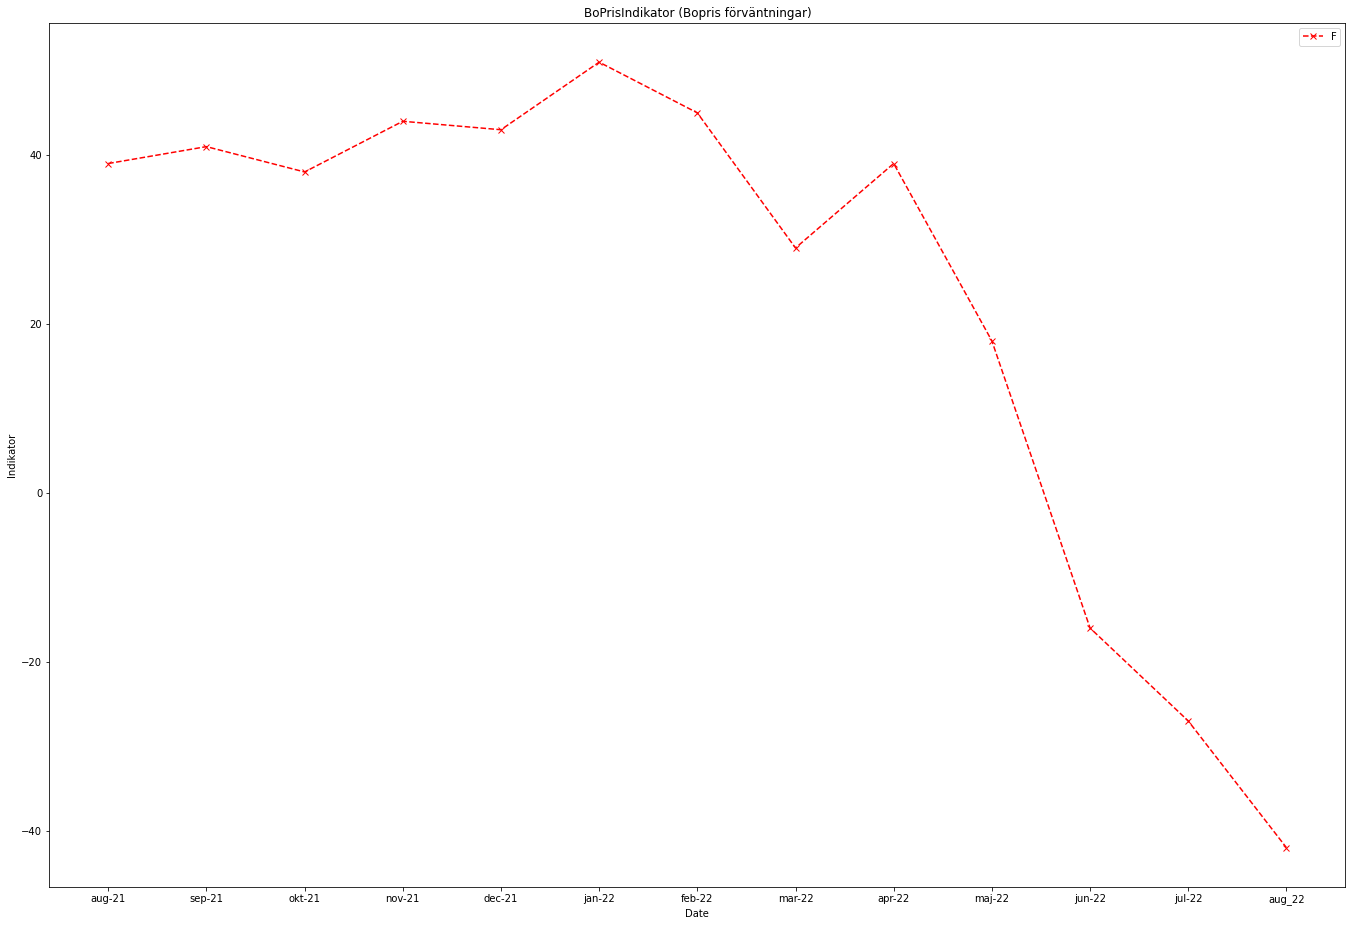

In [37]:
month=bo_pris_indik['Month']
y=bo_pris_indik.Indikator
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])

l1 = ax.plot(month,y,'rx--') # solid line with yellow colour and square marker
#l2 = ax.plot(x2,y,'gx--') # dash line with green colour and circle marker
ax.legend('Förväntningar') # legend placed at lower right
ax.set_title("BoPrisIndikator (Bopris förväntningar)")
ax.set_xlabel('Date')
ax.set_ylabel('Indikator')
plt.show()

### SLUTSATSER:

- Förlustaffärrerna ökat månad för månad sedan 220101
- Flest affärer gjordes i Maj
- I Juli var antalet noll & förluster större än vinsterna
- Det gjordes färre affärer i Juli än Juni
- Januari till och med Maj gjordes det mera vinst än förlust på husaffärerna
- I Maj gjordes det flest affärer
- De affärer som gick med vinst i Juni , gjorde i medel 15% vinst
- Förtroendet för att bostadspristet ska gå upp har sjunkit sedan i Maj
- Intressant att boprisindikatorns kurva nästan exakt påminner om fösäljningspris/slutpris på villor


### Medelpris för de hus som gått upp i värde 

In [320]:
big_prof_last.describe()

,b_price_kr,b_price_m2_kr,b_sale_rslt,amt_room,kvm_m2,ack_calc_res,starting_price
count,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01
mean,3.628068e+06,27625.000000,13.018182,2.704545,130.318182,0.130182,3.246021e+06
std,1.718896e+06,10152.995319,9.466963,3.231959,38.123284,0.094670,1.591004e+06
min,6.150000e+05,6500.000000,0.700000,-1.000000,36.000000,0.007000,5.452128e+05
25%,2.572500e+06,21625.000000,7.025000,-1.000000,106.000000,0.070250,2.192265e+06
50%,3.375000e+06,27450.000000,11.100000,4.000000,124.500000,0.111000,2.991018e+06
75%,4.697500e+06,35100.000000,16.700000,5.000000,160.000000,0.167000,4.336270e+06
max,7.325000e+06,50200.000000,43.300000,8.000000,205.000000,0.433000,6.742640e+06


In [234]:
big_profit_sales.starting_price.median()

3267650.0

In [316]:
# medel kvadratmeter
big_profit_sales.kvm_m2.mean()

133.3684210526316

### Medelpris för de hus som gått ner i värde :

In [313]:
low_prof_last.starting_price.median()

3298969.0721649486

In [318]:
low_prof_last.kvm_m2.mean()

137.45283018867926

In [319]:
zero_profit_sales.describe()

,b_price_kr,b_price_m2_kr,b_sale_rslt,amt_room,kvm_m2,ack_calc_res,starting_price
count,6.000000e+00,6.000000,6.0,6.000000,6.000000,6.0,6.000000e+00
mean,3.346667e+06,27600.000000,0.0,1.333333,126.833333,0.0,3.346667e+06
std,1.385463e+06,13569.672067,0.0,3.614784,21.867022,0.0,1.385463e+06
min,9.500000e+05,7600.000000,0.0,-1.000000,98.000000,0.0,9.500000e+05
25%,2.770000e+06,19000.000000,0.0,-1.000000,116.000000,0.0,2.770000e+06
50%,3.870000e+06,30350.000000,0.0,-1.000000,123.500000,0.0,3.870000e+06
75%,4.332500e+06,37425.000000,0.0,4.250000,137.000000,0.0,4.332500e+06
max,4.500000e+06,42300.000000,0.0,6.000000,161.000000,0.0,4.500000e+06


In [206]:
zero_profit_sales.starting_price.median()

2972500.0

In [221]:
zero_profit_sales.kv_m.mean()

139.0625

In [229]:
low_profit_sales.describe()

,b_price_kr,b_sale_rslt,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01
mean,3.204138e+06,-6.603448,5.068966,24486.206897,132.620690,-0.066034,3.374929e+06
std,1.271346e+06,5.281537,1.334462,8672.605645,40.263785,0.052815,1.289800e+06
min,4.200000e+05,-23.600000,2.000000,6900.000000,61.000000,-0.236000,5.191200e+05
25%,2.550000e+06,-8.000000,4.000000,19800.000000,109.000000,-0.080000,2.693725e+06
50%,3.200000e+06,-5.400000,5.000000,26400.000000,122.000000,-0.054000,3.484800e+06
75%,4.100000e+06,-3.000000,6.000000,31100.000000,156.000000,-0.030000,4.305400e+06
max,5.200000e+06,-0.700000,8.000000,40400.000000,260.000000,-0.007000,5.480800e+06


In [207]:
low_profit_sales.starting_price.median()

3583600.0

In [222]:
low_profit_sales.kv_m.mean()

137.4935064935065

In [256]:
low_profit_sales.query('kv_m > 99 and starting_price > 2000000' )

,b_loc,b_price_kr,b_sale_rslt,b_sale_date,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
8,Sjogerstad Mariedal,2550000,-8.8,2022-07-08,4,22200,115,-0.088,2774400.0
11,Skolvägen 9,2100000,-12.3,2022-07-04,-1,16200,130,-0.123,2358300.0
13,Klagstorpsvägen 21,3200000,-3.0,2022-07-02,7,20600,155,-0.030,3296000.0
14,Västerleden 13,2000000,-8.0,2022-07-01,6,19400,103,-0.080,2160000.0
16,Jon Måns väg 12,3400000,-5.4,2022-06-30,8,27600,123,-0.054,3583600.0
17,Stationsvägen 16A,2400000,-3.8,2022-06-30,5,19800,121,-0.038,2491200.0
19,Stationsvägen 6,3100000,-5.9,2022-06-24,7,11900,260,-0.059,3282900.0
23,Svedjevägen 3,3300000,-5.6,2022-06-18,6,26400,125,-0.056,3484800.0
24,Orkidévägen 2,2900000,-9.4,2022-06-17,4,24800,117,-0.094,3172600.0
29,Esbjörntorp Storegården 1,2800000,-6.0,2022-06-15,-1,17000,165,-0.060,2968000.0


In [265]:
low_profit_sales.query('kv_m > 99' ).starting_price.mean()

3821751.923076923

### Vilket tidspann

In [146]:
min(bost_df.b_sale_date)

Timestamp('2022-01-07 00:00:00')

In [307]:
min(big_prof_last.b_sale_date)

Timestamp('2022-04-01 00:00:00')

In [147]:
max(bost_df.b_sale_date)

Timestamp('2022-07-15 00:00:00')

In [152]:
bost_df['b_sale_date'].agg(['min','max'])

min   2022-01-07
max   2022-07-15
Name: b_sale_date, dtype: datetime64[ns]

### Slutsats

- Boprisindikatorn visar på lågt förtroende för ökande bopriser
- Medelfösäljningspris har minskat
- Juli månad var den månad där det var större förluster per försäljning än de tidigare måndaderna